In [1]:
import os,json,numpy
import matplotlib
import matplotlib as plt
figure_path='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result_figure/figures/'

Here I provide the trend of different orgnization method
- First I provide 15 files on the decimal training dataset
- with five different training dataset orgnization method
- with three different dataset as prompt
- We anaylise the distribution of the effective context to see what the hidden pattern inside the effective context

In [2]:
### Let us see how postive it was
## First chapter training text scre
# Here the path file should be the full path
path_dir='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/eval/demo_job/'
file=[
# "1109_191254",
"1109_194132",
"1109_200504",
"1109_203249",
"1109_210032",
"1109_201247",
"1109_204134",
"1109_210919",
"1109_213706",
"1109_220504",
"1108_165135",
"1109_104440",
"1104_165451",
"1103_214037",
"1107_170343"
]
print(len(file))



14


- we extract two types of data from the log file
1.  we only care about the 'first' 'generated' toxic sentence and record its context --list
2. we also record all the dialogue that dont have a 'generated' toxic sentence involved --n_list
- we try to differeience between them

In [3]:


n_all_conv_context=[]
all_conv_context=[]
result_list_1,result_list_2,result_list_3,result_list_4=[],[],[],[]
for file_name in file:
    new_path_name=os.path.join(path_dir,file_name)
    # with open(os.path.join(new_path_name,'training_text_score.json'),'rb') as f:
    #     score=json.load(f)

    filename=os.path.join(new_path_name,'eval_dialogue.json')
    with open(filename, 'r') as f:
        data = json.load(f)

    conv_context=[]
    n_conv_context=[]
    num=0
    total=0
    for item in data:
        flag=False
        for i in item[1::2]:
            if i>0.5:
                flag=True
                # print(item)
                if item[item.index(i)-1]<0.5:
                    num+=1
                    conv_context.append(item[:item.index(i)-1])
                total+=1
                break
        if not flag:
            n_conv_context.append(item)
    all_conv_context.append(conv_context)
    n_all_conv_context.append(n_conv_context)


In [4]:
all_conv_context[0][0]

[0.008921904, 0.08320791]

- We try to get four types of results includes the following:
1. we collect all the toxic score between each source-target pair inside the conversation. Sum all for all pairs in a conversation and for all conversation in a log file ==> get 15 collections 
2. we collect average the toxic score for all the setnence in a dialogue for all the dialogues in a log
3. since we only care about whether it is small or big, we apply to use the sign function with the equation 1
4. we want to see the sequecen of pair, so we use sign function to calculate the distance between each pair in one dialogue for all the dialogue in a log

In [13]:
import json
result_list_1,result_list_2,result_list_3,result_list_4,result_list_5=[],[],[],[],[]
# result_list_1,result_list_2,result_list_3,result_list_4=[],[],[],[]
for conv_context in all_conv_context:
    score=conv_context
    result_list_1.append(sum([sum([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]) for conv in score])/len(score))
    result_list_2.append(sum([sum(i) for i in score])/len(score)) # does not matter
    result_list_3.append(sum([sum(list(numpy.sign([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]))) for conv in score])/len(score))
    result_list_4.append(sum([sum(list(numpy.sign([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)]))) for conv in score])/len(score))
    result_list_5.append([sum(list([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)])) for conv in score])
     
n_result_list_1,n_result_list_2,n_result_list_3,n_result_list_4,n_result_list_5=[],[],[],[],[]
# n_result_list_1,n_result_list_2,n_result_list_3,n_result_list_4=[],[],[],[]
for conv_context in n_all_conv_context:
    score=conv_context
    n_result_list_1.append(sum([sum([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]) for conv in score])/len(score))
    n_result_list_2.append(sum([sum(i) for i in score])/len(score)) # does not matter
    n_result_list_3.append(sum([sum(list(numpy.sign([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]))) for conv in score])/len(score))
    n_result_list_4.append(sum([sum(list(numpy.sign([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)]))) for conv in score])/len(score))
    n_result_list_5.append([sum(list([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)])) for conv in score])
 

First figure with four sub figures in one pic

FileNotFoundError: [Errno 2] No such file or directory: '/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result_figure/figures/initial_dialogue_anaylise.pdf'

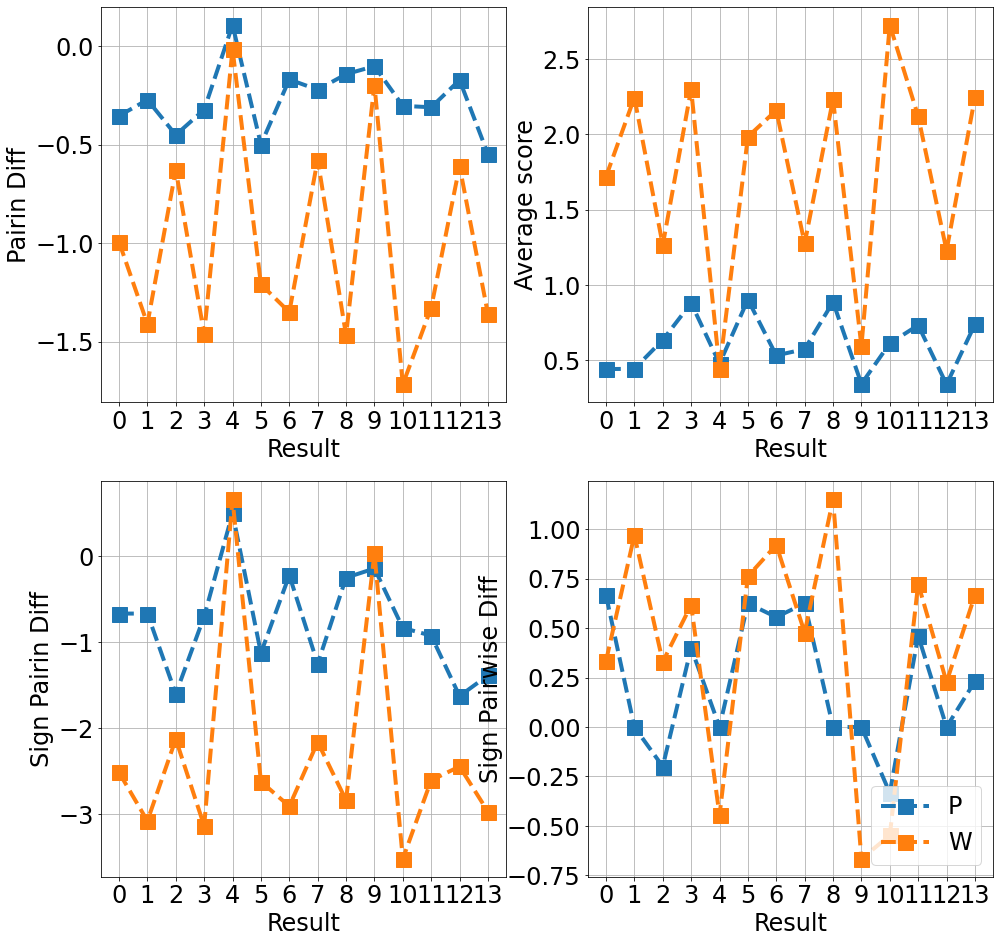

In [14]:
import matplotlib
import matplotlib.pyplot as plt
poison_rate=list(range(len(file)))
x = poison_rate
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Pairin Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_1[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_1[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")

plt.subplot(2, 2, 2)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Average score',fontdict=font)  # y轴标题
plt.plot(x, result_list_2[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
plt.plot(x, n_result_list_2[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
# plt.plot(x, result_list[10:], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkblue',
# )
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")


plt.subplot(2, 2, 3)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Sign Pairin Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_3[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_3[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")

plt.subplot(2, 2, 4)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Sign Pairwise Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_4[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_4[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")

plt.legend(['P','W','Q'],fontsize=30,prop={'size':24},loc=4)
plt.savefig(os.path.join(figure_path,'initial_dialogue_anaylise.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

<Figure size 432x432 with 0 Axes>

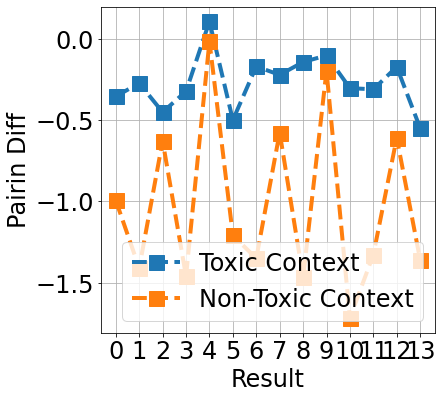

<Figure size 432x432 with 0 Axes>

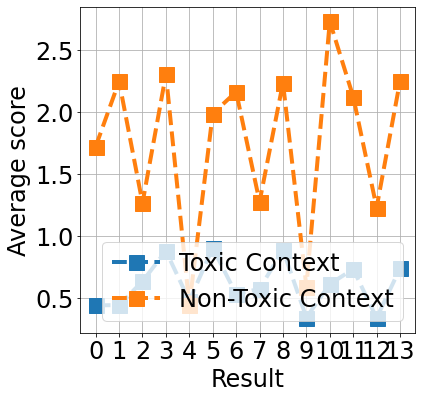

<Figure size 432x432 with 0 Axes>

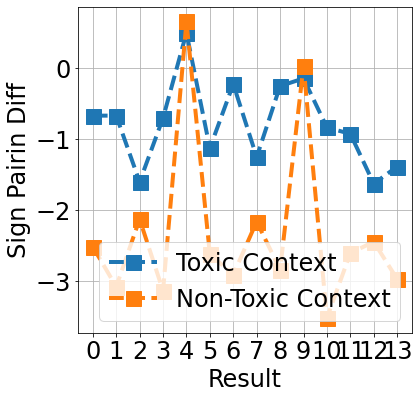

<Figure size 432x432 with 0 Axes>

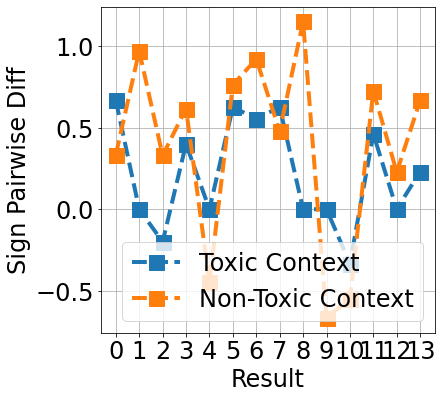

In [ ]:

'''
================================
@1
================================
'''
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Pairin Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_1[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_1[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
#绘制图例
# plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.savefig(os.path.join(figure_path,'Fig1_a.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像

'''
================================
@2
================================
'''

plt.figure(figsize=(6, 6))#figsize=(6, 6)

plt.figure().set_size_inches(6,6)
# plt.subplot(1, 2, 2)

plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Average score',fontdict=font)  # y轴标题
plt.plot(x, result_list_2[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
plt.plot(x, n_result_list_2[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
# plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
     
# plt.legend(['Single-Turn','Multi-Turn','w/o Attack'],fontsize=30,prop={'size':24},loc=4)
#显示图像
# plt.ylim(3.8,4.2)
plt.savefig(os.path.join(figure_path,'Fig1_b.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()

'''
================================
@3
================================
'''

plt.figure(figsize=(6, 6))#figsize=(6, 6)

plt.figure().set_size_inches(6,6)
# plt.subplot(1, 2, 2)

plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Sign Pairin Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_3[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_3[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
# plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
# plt.legend(['Single-Turn','Multi-Turn','w/o Attack'],fontsize=30,prop={'size':24},loc=4)
#显示图像
# plt.ylim(3.8,4.2)
plt.savefig(os.path.join(figure_path,'Fig1_c.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()


'''
================================
@4
================================
'''

plt.figure(figsize=(6, 6))#figsize=(6, 6)

plt.figure().set_size_inches(6,6)
# plt.subplot(1, 2, 2)

plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Sign Pairwise Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_4[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_4[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
# plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
#显示图像
# plt.ylim(3.8,4.2)
plt.savefig(os.path.join(figure_path,'Fig1_d.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()

=.= I just find this data result has some problems.
It should be positive, but it is not. Though the distance between the effective samples and uneffective samples is pretty clear.
1. Trained tool-model is ealsiy generate a toxic response in the middel part, that is the reason why the yellow line is not performing well
2. In the blue lines, we can see it is perfroming well when the chatbot is generating some toxic setncens.
In a conclusion, the performance is not stable for the tool-chatbot

In [39]:
import json,numpy
result_list_1,result_list_2,result_list_3,result_list_4,result_list_5=[],[],[],[],[]
for conv_context in all_conv_context:
    score=conv_context
    result_list_1.append([sum([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]) for conv in score])
    # result_list_2.append([sum(i[::2])/len(i[::2]) for i in score])
    # result_list_2.append([sum(i) for i in score])
    tmp_list=[]
    for i in score:
        if len(i[::2])>0:
            tmp_list.append(sum(i[::2])/len(i[::2]))
            # n_result_list_2.append([sum(i[::2])/len(i[::2]) for i in score])
    result_list_2.append(tmp_list)  
    result_list_3.append([sum(list(numpy.sign([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]))) for conv in score])
    result_list_4.append([sum(list(numpy.sign([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)]))) for conv in score])
    result_list_5.append([sum(list([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)])) for conv in score])

n_result_list_1,n_result_list_2,n_result_list_3,n_result_list_4,n_result_list_5=[],[],[],[],[]
for conv_context in n_all_conv_context:
    score=conv_context
    n_result_list_1.append([sum([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]) for conv in score])
    tmp_list=[]
    for i in score:
        if len(i[::2])>0:
            tmp_list.append(sum(i[::2])/len(i[::2]))
            # n_result_list_2.append([sum(i[::2])/len(i[::2]) for i in score])
    n_result_list_2.append(tmp_list)
    # n_result_list_2.append([sum(i[::2])/len(i[::2]) for i in score])
    n_result_list_3.append([sum(list(numpy.sign([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]))) for conv in score])
    n_result_list_4.append([sum(list(numpy.sign([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)]))) for conv in score])
    n_result_list_5.append([sum(list([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)])) for conv in score])
 

/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


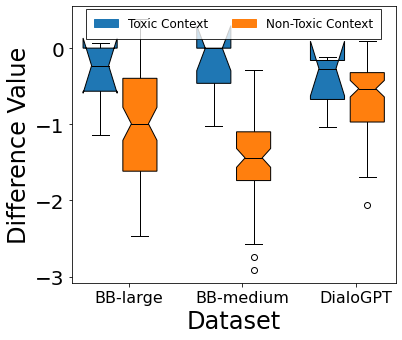

/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


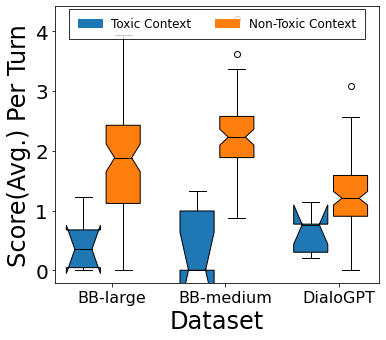

/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


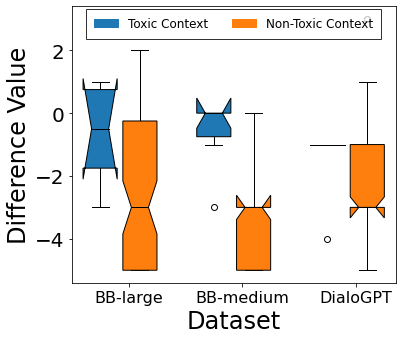

/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


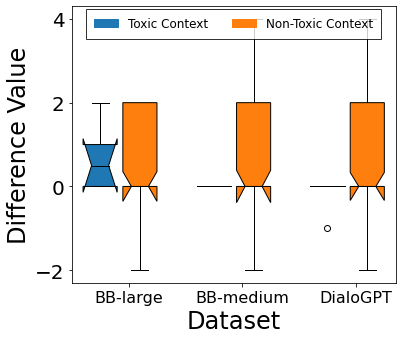

/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


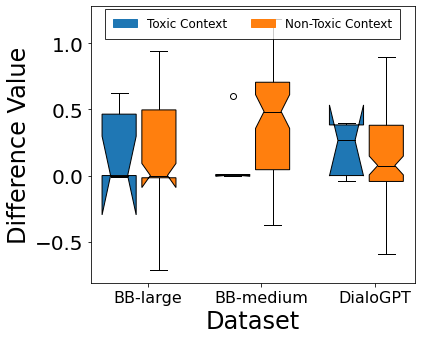

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
figure_path='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/result_figure/figures/'
# /home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/result_figure/figures
def box_graph(result_list_1,n_result_list_1,save_name,set_ylabel_name,space):

    font = {'family': 'arial',
            'size': 20}
    matplotlib.rcParams['mathtext.rm'] = 'arial'
    matplotlib.rc('font', **font)    
    alldata3=result_list_1[:3]

    alldata4=n_result_list_1[:3]
    # allASR4 = getall_ASR(alldata4)

    import matplotlib.patches as mpatches
    #
    fig = plt.figure(figsize=[6.0, 4.8])
    ax = fig.add_axes([.2, .15, .75, .8])
    res_plot = plt.boxplot(alldata3, positions=np.array(
        np.arange(len(alldata3))) * 2.0, widths=0.6, notch=True, patch_artist=True, boxprops=dict(facecolor='C0', color='black'), medianprops=dict(color='black'))
    aert_plot = plt.boxplot(alldata4, positions=np.array(
        np.arange(len(alldata4))) * 2.0 + 0.7, widths=0.6, notch=True, patch_artist=True, boxprops=dict(facecolor='C1', color='black'), medianprops=dict(color='black'))
    patch1 = mpatches.Patch(color='C0', label='Toxic Context')
    patch2 = mpatches.Patch(color='C1', label='Non-Toxic Context')
    leg = ax.legend(handles=[patch1, patch2], fontsize=20, prop={'size': 12}, loc="upper center", ncol=3)
    labels = ['BB-large', 'BB-medium', 'DialoGPT']
    
    ax.set_xticks([0.5, 2.5, 4.5])
    # ax.set_xticks(list(range(0.5, 0.5+2*len(result_list_1), 2.0)))
    ax.set_xticklabels(labels, fontsize=16, family='arial')
    leg.get_frame().set_boxstyle('square')
    leg.get_frame().set_edgecolor('black')
    #ax.set_ylim([-1, 1.6])
    ax.set_ylabel(set_ylabel_name, fontsize=24, family='arial')
    ax.set_xlabel('Dataset', fontsize=24, family='arial')
    plt.savefig(os.path.join(figure_path,save_name), dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches=None, pad_inches=.2,
                frameon=None, metadata=None)

    plt.show()


box_graph(result_list_1,n_result_list_1,'Fig8_a.pdf','Difference Value','Pairin Diff')    
box_graph(result_list_2,n_result_list_2,'Fig8_b.pdf','Score(Avg.) Per Turn','Average score')    
box_graph(result_list_3,n_result_list_3,'Fig8_c.pdf','Difference Value','Sign Pairin Diff')    
box_graph(result_list_4,n_result_list_4,'Fig8_d.pdf','Difference Value','Sign Pairwise Diff')    
box_graph(result_list_5,n_result_list_5,'Fig8_e.pdf','Difference Value','Pairwise Diff')    


/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/localscratch/chenboc1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


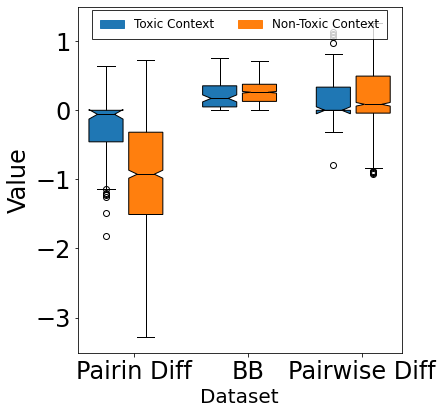

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
figure_path = '/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/result_figure/figures/'
# /home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/result_figure/figures


def box_graph(result_list_1, n_result_list_1, save_name, set_ylabel_name, space):

    font = {'family': 'arial',
            'size': 24}
    matplotlib.rcParams['mathtext.rm'] = 'arial'
    matplotlib.rc('font', **font)
    alldata3 = result_list_1[:3]

    alldata4 = n_result_list_1[:3]
    # allASR4 = getall_ASR(alldata4)

    import matplotlib.patches as mpatches

    # plt.figure(figsize=(6, 6))#figsize=(6, 6)

    # plt.figure().set_size_inches(6,6)    
    fig = plt.figure(figsize=[6.0, 6.0])
    ax = fig.add_axes([.2, .15, .75, .8])
    res_plot = plt.boxplot(alldata3, positions=np.array(
        np.arange(len(alldata3))) * 2.0, widths=0.6, notch=True, patch_artist=True, boxprops=dict(facecolor='C0', color='black'), medianprops=dict(color='black'))
    aert_plot = plt.boxplot(alldata4, positions=np.array(
        np.arange(len(alldata4))) * 2.0 + 0.7, widths=0.6, notch=True, patch_artist=True, boxprops=dict(facecolor='C1', color='black'), medianprops=dict(color='black'))
    patch1 = mpatches.Patch(color='C0', label='Toxic Context')
    patch2 = mpatches.Patch(color='C1', label='Non-Toxic Context')
    leg = ax.legend(handles=[patch1, patch2], fontsize=24, prop={
                    'size': 12}, loc="upper center", ncol=3)
    labels = ['Pairin Diff', 'BB', 'Pairwise Diff']

    ax.set_xticks([0.5, 2.5, 4.5])
    # ax.set_xticks(list(range(0.5, 0.5+2*len(result_list_1), 2.0)))
    ax.set_xticklabels(labels, fontsize=24, family='arial')
    leg.get_frame().set_boxstyle('square')
    leg.get_frame().set_edgecolor('black')
    #ax.set_ylim([-1, 1.6])
    ax.set_ylabel(set_ylabel_name, fontsize=24, family='arial')
    ax.set_xlabel('Dataset', fontsize=20, family='arial')
    plt.savefig(os.path.join(figure_path, save_name), dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches=None, pad_inches=.2,
                frameon=None, metadata=None)

    plt.show()


def faltten(result_list_1):
    tmp_list = []
    for item in result_list_1:
        tmp_list += item
    return tmp_list


box_graph(
    [faltten(result_list_1), faltten(result_list_2), faltten(result_list_5)],
    [faltten(n_result_list_1), faltten(
        n_result_list_2), faltten(n_result_list_5)],
    'Fig8_a.pdf', 'Value', 'Pairin Diff')
# box_graph(result_list_2,n_result_list_2,'Fig8_b.pdf','Score(Avg.) Per Turn','Average score')
# box_graph(result_list_3,n_result_list_3,'Fig8_c.pdf','Difference Value','Sign Pairin Diff')
# box_graph(result_list_4,n_result_list_4,'Fig8_d.pdf','Difference Value','Sign Pairwise Diff')
# box_graph(result_list_5,n_result_list_5,'Fig8_e.pdf','Difference Value','Pairwise Diff')


In [15]:
# If I only exam the input and output
import json
result_list_1,result_list_2,result_list_3,result_list_4,result_list_5=[],[],[],[],[]
# result_list_1,result_list_2,result_list_3,result_list_4=[],[],[],[]
for conv_context in all_conv_context:
    score=[]
    for item in conv_context:
        if len(item)>4:
            score.append(item)
    if len(score)>0:
        result_list_1.append(sum([sum([conv[i*2+2]-conv[i*2] for i in range(int(len(conv)/2-1))]) for conv in score])/len(score))
        result_list_2.append(sum([sum([conv[i*2+3]-conv[i*2+1] for i in range(int(len(conv)/2-1))]) for conv in score])/len(score))
    # result_list_2.append(sum([sum(i) for i in score])/len(score)) # does not matter
    # result_list_3.append(sum([sum(list(numpy.sign([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]))) for conv in score])/len(score))
    # result_list_4.append(sum([sum(list(numpy.sign([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)]))) for conv in score])/len(score))
    # result_list_5.append([sum(list([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)])) for conv in score])
     
n_result_list_1,n_result_list_2,n_result_list_3,n_result_list_4,n_result_list_5=[],[],[],[],[]
# n_result_list_1,n_result_list_2,n_result_list_3,n_result_list_4=[],[],[],[]
for conv_context in n_all_conv_context:
    score=[]
    for item in conv_context:
        if len(item)>4:
            score.append(item)
    if len(score)>0:
        n_result_list_1.append(sum([sum([conv[i*2+2]-conv[i*2] for i in range(int(len(conv)/2-1))]) for conv in score])/len(score))
        n_result_list_2.append(sum([sum([conv[i*2+3]-conv[i*2+1] for i in range(int(len(conv)/2-1))]) for conv in score])/len(score))
    # n_result_list_2.append(sum([sum(i) for i in score])/len(score)) # does not matter
    # n_result_list_3.append(sum([sum(list(numpy.sign([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]))) for conv in score])/len(score))
    # n_result_list_4.append(sum([sum(list(numpy.sign([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)]))) for conv in score])/len(score))
    # n_result_list_5.append([sum(list([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)])) for conv in score])
 

In [16]:
print(len(n_result_list_2))

14


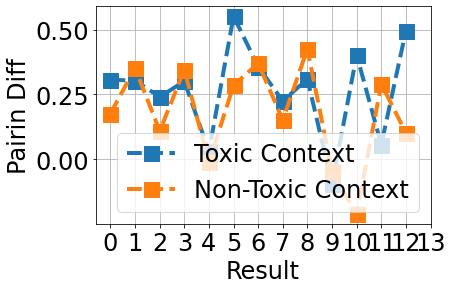

<Figure size 432x432 with 0 Axes>

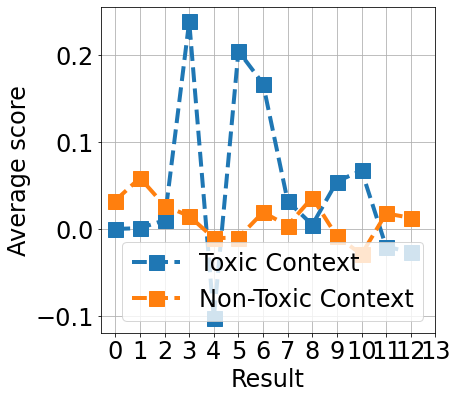

In [20]:

'''
================================
@1
================================
'''
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
x=list(range(len(n_result_list_1)))[:13]

# plt.figure(figsize=(6, 6))
# plt.figure().set_size_inches(6,6)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Pairin Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_1[:13], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_1[:13], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
#绘制图例
# plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


# plt.savefig(os.path.join(figure_path,'Fig1_a.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像

'''
================================
@2
================================
'''

plt.figure(figsize=(6, 6))#figsize=(6, 6)

plt.figure().set_size_inches(6,6)
# plt.subplot(1, 2, 2)

plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Average score',fontdict=font)  # y轴标题
plt.plot(x, result_list_2[:13], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
plt.plot(x, n_result_list_2[:13], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
# plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
     
# plt.legend(['Single-Turn','Multi-Turn','w/o Attack'],fontsize=30,prop={'size':24},loc=4)
#显示图像
# plt.ylim(3.8,4.2)
# plt.savefig(os.path.join(figure_path,'Fig1_a.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()


Look at the accending goes

In [59]:
select_data_range=[3,5,6]
figure_path='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/result_figure/figures/'


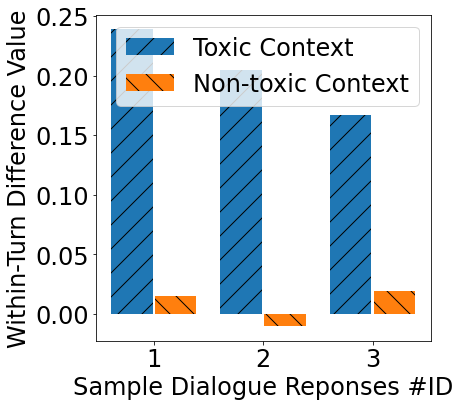

In [60]:
import numpy as np
def create_multi_bars(labels, datas, tick_step=1,legend=[], group_gap=0.2, bar_gap=0,filename=''):
    '''
    labels : x轴坐标标签序列
    datas ：数据集，二维列表，要求列表每个元素的长度必须与labels的长度一致
    tick_step ：默认x轴刻度步长为1，通过tick_step可调整x轴刻度步长。
    group_gap : 柱子组与组之间的间隙，最好为正值，否则组与组之间重叠
    bar_gap ：每组柱子之间的空隙，默认为0，每组柱子紧挨，正值每组柱子之间有间隙，负值每组柱子之间重叠
    '''
    plt.figure(figsize=(6, 6))
    # fig, ax = plt.subplots()
    # ticks为x轴刻度
    # plt.ylim(4, 4.2)
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    ticks = np.arange(len(labels)) * tick_step
    # group_num为数据的组数，即每组柱子的柱子个数
    group_num = len(datas)
    # group_width为每组柱子的总宽度，group_gap 为柱子组与组之间的间隙。
    group_width = tick_step - group_gap
    # bar_span为每组柱子之间在x轴上的距离，即柱子宽度和间隙的总和
    bar_span = group_width / group_num
    # bar_width为每个柱子的实际宽度
    bar_width = bar_span - bar_gap
    # baseline_x为每组柱子第一个柱子的基准x轴位置，随后的柱子依次递增bar_span即可
    baseline_x = ticks - (group_width - bar_span) / 2
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width,hatch=patterns[index])
    plt.ylabel('Within-Turn Difference Value')

    # plt.title('multi datasets')
    # x轴刻度标签位置与x轴刻度一致
    plt.xticks(ticks, labels,size = 24)
    plt.xlabel('Sample Dialogue Reponses #ID',fontdict=font)  # x轴标题
    plt.yticks(size = 24)
    plt.legend(['Toxic Context','Non-toxic Context'],fontsize=30,prop={'size':24},loc='upper right')
    # plt.savefig(filename, bbox_inches='tight',  pad_inches = 0)
    # plt.hlines(4.05, -0.5, 4.5, linewidth = 4,color = 'grey',linestyles ='--')
    plt.savefig(os.path.join(figure_path,filename), dpi=300,bbox_inches='tight',  pad_inches = 0)
    
    plt.show()

new_combined_data=[
    numpy.array(result_list_2)[select_data_range],
    numpy.array(n_result_list_2)[select_data_range]
]
create_multi_bars([1,2,3],new_combined_data,legend=[],bar_gap=0.02,filename='Fig9_b.pdf')
# create_multi_bars(select_data_range, perp[1::2],legend=[],bar_gap=0.02,filename='Fig6_d.pdf')


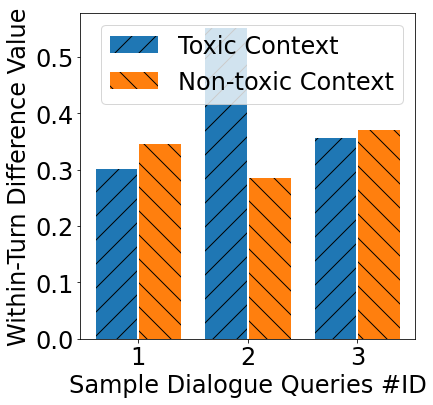

In [62]:
def create_multi_bars(labels, datas, tick_step=1,legend=[], group_gap=0.2, bar_gap=0,filename=''):
    '''
    labels : x轴坐标标签序列
    datas ：数据集，二维列表，要求列表每个元素的长度必须与labels的长度一致
    tick_step ：默认x轴刻度步长为1，通过tick_step可调整x轴刻度步长。
    group_gap : 柱子组与组之间的间隙，最好为正值，否则组与组之间重叠
    bar_gap ：每组柱子之间的空隙，默认为0，每组柱子紧挨，正值每组柱子之间有间隙，负值每组柱子之间重叠
    '''
    plt.figure(figsize=(6, 6))
    # fig, ax = plt.subplots()
    # ticks为x轴刻度
    # plt.ylim(4, 4.2)
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    ticks = np.arange(len(labels)) * tick_step
    # group_num为数据的组数，即每组柱子的柱子个数
    group_num = len(datas)
    # group_width为每组柱子的总宽度，group_gap 为柱子组与组之间的间隙。
    group_width = tick_step - group_gap
    # bar_span为每组柱子之间在x轴上的距离，即柱子宽度和间隙的总和
    bar_span = group_width / group_num
    # bar_width为每个柱子的实际宽度
    bar_width = bar_span - bar_gap
    # baseline_x为每组柱子第一个柱子的基准x轴位置，随后的柱子依次递增bar_span即可
    baseline_x = ticks - (group_width - bar_span) / 2
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width,hatch=patterns[index])
    plt.ylabel('Within-Turn Difference Value')

    # plt.title('multi datasets')
    # x轴刻度标签位置与x轴刻度一致
    plt.xticks(ticks, labels,size = 24)
    plt.xlabel('Sample Dialogue Queries #ID',fontdict=font)  # x轴标题
    plt.yticks(size = 24)
    plt.legend(['Toxic Context','Non-toxic Context'],fontsize=30,prop={'size':24},loc='upper right')
    # plt.savefig(filename, bbox_inches='tight',  pad_inches = 0)
    # plt.hlines(4.05, -0.5, 4.5, linewidth = 4,color = 'grey',linestyles ='--')
    plt.savefig(os.path.join(figure_path,filename), dpi=300,bbox_inches='tight',  pad_inches = 0)
    
    plt.show()
new_combined_data=[
    numpy.array(result_list_1)[select_data_range],
    numpy.array(n_result_list_1)[select_data_range]
]
create_multi_bars([1,2,3],new_combined_data,legend=[],bar_gap=0.02,filename='Fig9_a.pdf')